In [7]:
#Mounting to the google drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
#Cloning the dataset from github
#This is where the DATA comes from 

#! git clone https://github.com/EwaSzyszka/Sample_dataset.git

! git clone  https://github.com/EwaSzyszka/Stillness

fatal: destination path 'Stillness' already exists and is not an empty directory.


In [9]:
#Checking the location that we are at 

! ls

drive  gdrive  sample_data  Sample_dataset  Stillness


In [10]:
#Checking the working directory 

! pwd

/content


In [ ]:
#now you can go to content --> Sample_dataset  --> a and you will find the files from the github 

#a = "/content/Sample_dataset/A"

In [ ]:
#print(a)

/content/Sample_dataset/A


In [ ]:
#___________________ HERE BEGINS THE VGG MODEL ___________________

In [11]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten 
import keras

#Model loading imports 
import json
import numpy as np
from keras import models
from keras.models import model_from_json, load_model

#Data procesing imports 
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import numpy as np
import random
import pickle

#Visualization imports 
import os
import cv2
import glob
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
from IPython.display import display
%matplotlib inline

In [12]:

#_____ SETTING THE DATA PATH ______
#DATADIR = "/content/Sample_dataset/"
DATADIR = "/content/Stillness/"

#_____ CATEGORIES OF CLASSES ______
CATEGORIES = ['A','B']
#This is the final list for stillness:
#["A", "B", "C", "D", "E","F", "G", "I", "K" , "L", "M", "N" , "O", "P", "R", "S", "T" , "U" , "W", "Y" ]

#_____ SETTING UP THE TRAINING DATA ______

'''setting the size of the images to 50x50'''
IMG_SIZE = 224

training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        '''One hot encoding'''
        one_hot_target = np.zeros(len(CATEGORIES))
        class_num = CATEGORIES.index(category)  
        one_hot_target[class_num] = 1
        
        for img in os.listdir(path):
            try:
                '''resizing the images and attaching one hot encoded values'''
                img_array = cv2.imread(os.path.join(path, img)) 
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE),3)   #I added 3 here that was not there before 
                training_data.append([new_array,one_hot_target])  
            except Exception as e:
                pass

create_training_data()

#___ SHUFFLING THE DATA TO IMPROVE THE TRAINING QUALITY _____
random.shuffle(training_data)

#____PRINTING SAMPLE DATA_____
for sample in training_data[:1]:
    print("This is one hot encoded label: \n", sample[1])
    print("This is np.array of an image: \n", sample[0])

X = [] #feature set
y = [] #labels

for features, label in training_data:
    X.append(features)
    y.append(np.asarray(label)) #converting y to np array 
    
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE, 3) # 1 because it is a gray scale


This is one hot encoded label: 
 [1. 0.]
This is np.array of an image: 
 [[[125 132 132]
  [125 132 131]
  [125 131 133]
  ...
  [109 127 139]
  [105 123 135]
  [255   0   0]]

 [[123 132 134]
  [127 133 135]
  [126 132 134]
  ...
  [ 99 116 130]
  [ 95 112 127]
  [255   0   0]]

 [[124 133 137]
  [123 129 131]
  [126 133 135]
  ...
  [ 94 114 128]
  [ 94 114 128]
  [255   0   0]]

 ...

 [[150 154 156]
  [151 155 155]
  [155 160 160]
  ...
  [246 244 253]
  [226 224 233]
  [255   0   0]]

 [[149 155 157]
  [154 158 157]
  [154 159 158]
  ...
  [234 232 242]
  [231 230 239]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]]


In [13]:
#____ NORMALIZING THE IMAGE DATA _____ 
X = X/255.0

In [14]:
#_____ PRINTING SHAPE OF X AND Y _____
X = np.asarray(X)
y = np.asarray(y)
print(X.shape,y.shape)

(97, 224, 224, 3) (97, 2)


In [15]:
#____ TEST-TRAIN SPLIT THE DATA _____ 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
#____ LENGTH OF THE TEST-TRAIN DATA_____

print("\n X train:",len(X_train),"\n y train:",len(y_train),"\n X test:" ,len(X_test),"\n y test:",len(y_test))


 X train: 64 
 y train: 64 
 X test: 33 
 y test: 33


In [17]:
#_____RESHAPING THE DATA ______ 

X_train = X_train.reshape(64,224,224,3)
X_test = X_test.reshape(33,224,224,3)

#X_train = X_train.reshape(64,50,50,3)
#X_test = X_test.reshape(33,50,50,3)
#X_train = X_train.reshape(589,50,50,3)
#X_test = X_test.reshape(291,50,50,3)

In [18]:
#____ LENGTH OF THE TEST-TRAIN DATA AFTER RESHAPING____

print("\n X train:",len(X_train),"\n y train:",len(y_train),"\n X test:" ,len(X_test),"\n y test:",len(y_test))


 X train: 64 
 y train: 64 
 X test: 33 
 y test: 33


In [19]:
#_____ CONVERTING TO NP.ARRAY _____
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
type(y_train)

numpy.ndarray

In [20]:
print(X_train.shape,y_train.shape)

(64, 224, 224, 3) (64, 2)


In [123]:
print(y_train)

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [21]:
#TRIAL FROM A BRILLIANT TUTORIAL https://deeplizard.com/learn/video/oDHpqu52soI 


from __future__ import division, print_function

import os, json
from glob import glob
import numpy as np
from scipy import misc, ndimage
from scipy.ndimage.interpolation import zoom

from keras import backend as K
from keras.layers.normalization import BatchNormalization
from keras.utils.data_utils import get_file
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers.pooling import GlobalAveragePooling2D
from keras.optimizers import SGD, RMSprop, Adam
from keras.preprocessing import image
import keras   
import keras.applications.vgg16
from  keras.layers import Input



input_tensor = Input(shape=(224,224,3))
VGG_model=keras.applications.vgg16.VGG16(weights='imagenet',include_top= True,input_tensor=input_tensor)

VGG_model.summary()


print(type(VGG_model))

#Replicating the VGG 16 model again appart from the last Dense layer, which needs to be changed. By default there are 1000 categories to be detected 
#and I need to change it to the desired number of categories detected. 
model = Sequential()
for layer in VGG_model.layers[:-1]:
    model.add(layer)

#you set this if the hands are included in the original imagenet category
for layer in model.layers:
    layer.trainable = False

#here you change the number of units to the number of categories that you need to recognise 
model.add(Dense(units=2, activation='softmax'))
model.summary()

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)
#the last dense layer must contain the number of predictions


#VGG_model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adadelta(rho=0.9), metrics=['sparse_categorical_accuracy'])
#VGG_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [108]:
'''
This is the correct VGG architecture. As I did not have an access to GPU to 
run the full model and the size of dataset was too big to train it on my computer's CPU
I have created below a simplified VGG architecture. Below you can find the code for the 
VGG-16 implementation which can be run on a GPU, after the input image size would be 
changed into 224 x 224, as the VGG-16 paper suggests. 
'''
#_______ VGG ________

from keras.layers import Conv2D, MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.layers import Convolution2D as Conv2D
from keras.layers import Conv2D
from keras.layers.convolutional import Deconv2D as Conv2DTranspose
#from tensorflow.keras import backend as k
#from tensorflow.keras.models import load_model
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Conv2D
#from tensorflow.keras.layers import MaxPooling2D
#from tensorflow.python.keras.layers import Flatten, Dense
from keras.optimizers import SGD
from keras.optimizers import adam

# Conv Block 1
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=X_train.shape[1:], name='block1_conv1', data_format='channels_last'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Conv Block 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Conv Block 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Conv Block 4
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Conv Block 5
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# FC layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(1000, activation='softmax'))


#model.compile(loss='categorical_crossentropy', optimizer= tf.keras.optimizers.SGD, metrics=['accuracy'])
#model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)



model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adadelta(rho=0.9), metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)


ValueError: ignored

In [107]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2, numpy as np

def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model

if __name__ == "__main__":
    im = cv2.resize(cv2.imread('cat.jpg'), (224, 224)).astype(np.float32)
    im[:,:,0] -= 103.939
    im[:,:,1] -= 116.779
    im[:,:,2] -= 123.68
    im = im.transpose((2,0,1))
    im = np.expand_dims(im, axis=0)

    # Test pretrained model
    model = VGG_16('vgg16_weights.h5')
    sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss='categorical_crossentropy')
    out = model.predict(im)
    print(np.argmax(out))

error: ignored

In [66]:
#________ SETTING UP THE SIMPLIFIED MODEL _______
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(50,50,3)))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(2, activation="softmax"))  #I have changed the number from 6 to 2 here 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Train on 64 samples, validate on 33 samples
Epoch 1/3
64/64 [==============================] - 1s 16ms/step - loss: 0.8987 - accuracy: 0.6875 - val_loss: 0.9146 - val_accuracy: 0.4242
Epoch 2/3
64/64 [==============================] - 1s 10ms/step - loss: 0.6718 - accuracy: 0.6562 - val_loss: 0.5489 - val_accuracy: 0.6364
Epoch 3/3
64/64 [==============================] - 1s 10ms/step - loss: 0.4982 - accuracy: 0.6562 - val_loss: 0.4751 - val_accuracy: 0.7879


In [22]:
#How to assess the model: 
#Model loss and model accuracy 
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6946404738859697
Test accuracy: 0.6363636255264282


[1. 0.]


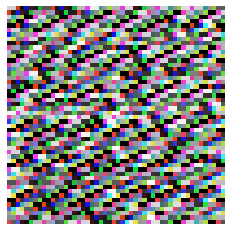

[0.4673105 0.5326895]


In [68]:
#________ MAKING A TEST PREDICTION _______

first_predictions = model.predict(X_test[:4])

'''Showing one hot encoded label that the prediction was made on '''
print(y_test[0])

"""Showing the image that the prediction was made on"""
plt.imshow(Image.fromarray(X_test[0],'RGB'), interpolation='nearest')
plt.axis("off")
plt.show()

'''Showing was was actually predicted'''
print(first_predictions[0])

In [ ]:
#____ SAVINGS THE TRAINED MODEL ____ 
model.save('my_model.h5')

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:             
     json_file.write(model_json) 

model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
#_______ LOADING THE TRAINED MODEL TO MAKE PREDICTIONS ON UNSEEN DATA ____
model = models.load_model('my_model.h5')

In [ ]:
#______ OBJECT OPENING TRAINED MODEL AND PREDICTING IMAGES FROM CAPTURED DATA_____

class SignLanguageModel(object):

    LETTER_LIST = ["A", "B", "C", "D", "E","F"]

    def __init__(self, model_json_file, model_weights_file):
        # load model from JSON file
        with open(model_json_file, "r") as json_file:
            loaded_model_json = json_file.read()
            self.loaded_model = model_from_json(loaded_model_json)

        # load weights into the new model
        self.loaded_model.load_weights(model_weights_file)
        self.loaded_model._make_predict_function()

    def predict_letter(self, img):
        self.preds = self.loaded_model.predict(img)
        print (self.preds)
        return SignLanguageModel.LETTER_LIST[np.argmax(self.preds)]

In [ ]:
#______ TIME TO CAPTURE DATA _____

import cv2

cam = cv2.VideoCapture(0)

cv2.namedWindow("test")

img_counter = 0

while True:
    ret, frame = cam.read()
    cv2.imshow("test", frame)

    
    if not ret:
        break
    k = cv2.waitKey(1)

    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        img_name = "Desktop/Code/ImageRecognition/datacapture/opencv_frame_{}.png".format(img_counter)
        cv2.imwrite(img_name, frame)
        print("{} written!".format(img_name))
        img_counter += 1

cam.release()

cv2.destroyAllWindows()